# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from google.colab import  drive
drive.mount('/drive')
# from google.colab import files

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# Import Data Sets

In [2]:
trainingDataSet = pd.read_csv('linear_reg_train_data.csv')
X_train = trainingDataSet.iloc[:, :-1].values
Y_train = trainingDataSet.iloc[:, -1:].values

In [3]:
testDataSet = pd.read_csv('linear_reg_test_data.csv')
X_test = testDataSet.iloc[:, :-1].values
Y_test = testDataSet.iloc[:, -1:].values

In [4]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Global variables

In [5]:
degree = 12
training_examples = X_train.shape[0]
test_examples = X_test.shape[0]
features = degree + 1
lambda_rr = 5

# Mean Square Error

In [6]:
def mse(Y, Y_predicted):
  cost = np.sum((Y - Y_predicted)**2) / len(Y)
  return cost

# Write Into CSV

In [7]:
def writeToCSV(path, data):
  with open(path, 'w') as f:
    writer = csv.writer(f)
    for word in data:
        writer.writerow(word)

# Transform DataSet

In [8]:
def transform(X,examples):
  X_copy = X;
  for i in range(2,degree+1):
    X = np.append(X, X_copy**i, axis = 1)
  return X #Phi

In [9]:
X_train_transformed = transform(X_train,training_examples)
X_train_transformed = np.append(np.ones((training_examples,1)), X_train_transformed, axis = 1)

In [10]:
X_test_transformed = transform(X_test,test_examples)
X_test_transformed = np.append(np.ones((test_examples,1)), X_test_transformed, axis = 1)

# Predict function

In [11]:
def predict(X,W):
  return np.dot(X,W)

# Learning model

## Normal Equation

In [12]:
def fit(X,Y):
  # w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
  # w = np.linalg.pinv(X.T @ X) @ X.T @ Y
  w = np.dot(X.T, X) + 0 
  w = np.linalg.inv(w)
  w = np.dot(w, np.dot(X.T,Y))
  return w

In [13]:
weights = fit(X_train_transformed, Y_train)

In [14]:
print("Weights")
print(weights)

Weights
[[-3.88596135e+01]
 [ 1.89702731e+01]
 [-1.37157056e+01]
 [ 1.56973334e+01]
 [-1.09922116e+01]
 [ 4.51746934e+00]
 [-1.12414032e+00]
 [ 1.63294229e-01]
 [-1.09448216e-02]
 [-3.21290006e-04]
 [ 1.14580338e-04]
 [-7.81906160e-06]
 [ 1.86771742e-07]]


## Ridge Regression

In [15]:
def fit_ridge(X, Y):
  w = np.dot(X.T, X) + lambda_rr * np.identity(degree + 1, dtype=None)
  w = np.linalg.inv(w)
  w = np.dot(w, np.dot(X.T,Y))
  return w

In [16]:
weights_rr = fit_ridge(X_train_transformed, Y_train)

In [17]:
print(weights_rr)

[[ 8.74783269e-01]
 [ 7.96699614e-01]
 [ 6.59228830e-01]
 [ 3.41966623e-01]
 [-3.45704229e-02]
 [-1.87674751e-01]
 [ 6.09960267e-02]
 [ 4.75513828e-03]
 [-5.88465205e-03]
 [ 1.31438123e-03]
 [-1.41808349e-04]
 [ 7.73575383e-06]
 [-1.71260488e-07]]


# Prediction

## Normal Equation

In [18]:
Y_pred_train = predict(X_train_transformed, weights)
writeToCSV('/drive/My Drive/PRML/Assignment1/Q1/1a_train_cf.csv', Y_pred_train)

In [19]:
Y_pred_test = predict(X_test_transformed, weights)
writeToCSV('/drive/My Drive/PRML/Assignment1/Q1/1a_test_cf.csv', Y_pred_test)

In [20]:
print(degree)
print(mse(Y_train, Y_pred_train))
print(mse(Y_test, Y_pred_test))

12
303.87961664338457
133.64281538913875


## Ridge Regression

In [21]:
Y_pred_train_rr = predict(X_train_transformed, weights_rr)
writeToCSV('/drive/My Drive/PRML/Assignment1/Q1/1a_train_rr.csv', Y_pred_train_rr)

In [22]:
Y_pred_test_rr = predict(X_test_transformed, weights_rr)
writeToCSV('/drive/My Drive/PRML/Assignment1/Q1/1a_test_rr.csv', Y_pred_test_rr)

In [23]:
print("Ridge " + str(degree))
print(mse(Y_train, Y_pred_train_rr))
print(mse(Y_test, Y_pred_test_rr))

Ridge 12
0.14109580574055017
0.8624368495445738


# Plot graphs

## Normal Equation

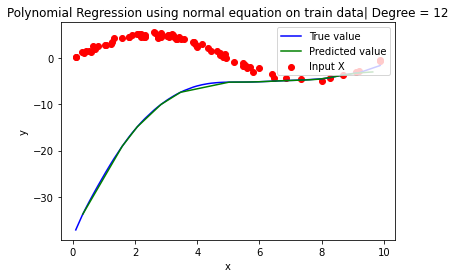

In [24]:
plt.scatter(X_train_copy, Y_train, color = 'red', label = 'Input X')
X_train_copy_plot, Y_pred_train_plot = zip(*sorted(zip(X_train_copy, Y_pred_train)))
plt.plot(X_train_copy_plot, Y_pred_train_plot, color = 'blue', label = 'True value')
X_test_copy_plot, Y_pred_test_plot = zip(*sorted(zip(X_test_copy, Y_pred_test)))
plt.plot(X_test_copy_plot, Y_pred_test_plot, color = 'green', label = 'Predicted value')
plt.title('Polynomial Regression using normal equation on train data| Degree = '+ str(degree))
plt.legend(loc="upper right")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

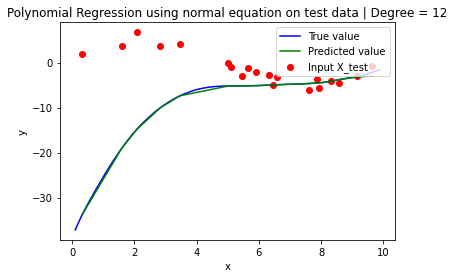

In [25]:
plt.scatter(X_test_copy, Y_test, color = 'red', label = 'Input X_test')
X_train_copy_plot, Y_pred_train_plot = zip(*sorted(zip(X_train_copy, Y_pred_train)))
plt.plot(X_train_copy_plot, Y_pred_train_plot, color = 'blue', label = 'True value')
X_test_copy_plot, Y_pred_test_plot = zip(*sorted(zip(X_test_copy, Y_pred_test)))
plt.plot(X_test_copy_plot, Y_pred_test_plot, color = 'green', label = 'Predicted value')
plt.title('Polynomial Regression using normal equation on test data | Degree = '+ str(degree))
plt.legend(loc="upper right")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Ridge Regression

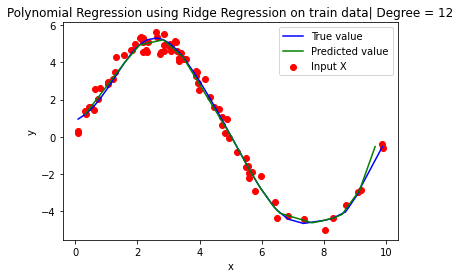

In [26]:
plt.scatter(X_train_copy, Y_train, color = 'red', label = 'Input X')
X_train_copy_plot, Y_pred_train_rr_plot = zip(*sorted(zip(X_train_copy, Y_pred_train_rr)))
plt.plot(X_train_copy_plot, Y_pred_train_rr_plot, color = 'blue', label = 'True value')
X_test_copy_plot, Y_pred_test_rr_plot = zip(*sorted(zip(X_test_copy, Y_pred_test_rr)))
plt.plot(X_test_copy_plot, Y_pred_test_rr_plot, color = 'green', label = 'Predicted value')
plt.title('Polynomial Regression using Ridge Regression on train data| Degree = '+ str(degree))
plt.legend(loc="upper right")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

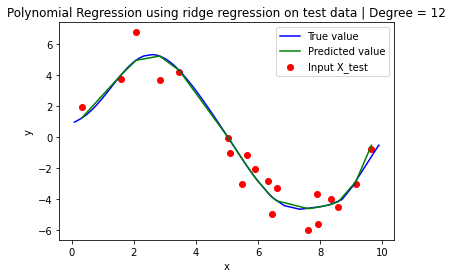

In [27]:
plt.scatter(X_test_copy, Y_test, color = 'red', label = 'Input X_test')
X_train_copy_plot, Y_pred_train_rr_plot = zip(*sorted(zip(X_train_copy, Y_pred_train_rr)))
plt.plot(X_train_copy_plot, Y_pred_train_rr_plot, color = 'blue', label = 'True value')
X_test_copy_plot, Y_pred_test_rr_plot = zip(*sorted(zip(X_test_copy, Y_pred_test_rr)))
plt.plot(X_test_copy_plot, Y_pred_test_rr_plot, color = 'green', label = 'Predicted value')
plt.title('Polynomial Regression using ridge regression on test data | Degree = '+ str(degree))
plt.legend(loc="upper right")
plt.xlabel('x')
plt.ylabel('y')
plt.show()